In [ ]:
import pandas as pd
file_path = "OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')
# pasta e pomodoro

In [26]:
# Controlla se la colonna "Number of Attendances" esiste e che sia numerica
if 'Number_Of_Attendances' in df_original.columns and pd.api.types.is_numeric_dtype(df_original['Number_Of_Attendances']):
    # Crea il dataset esteso replicando ogni riga in base a 'Number of Attendances'
    print("Still working...")
    df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
    
    # Rimuove la colonna "Number of Attendances" se non necessaria
    df = df.drop(columns=['Number_Of_Attendances'])
    
    print(f"\nDimensioni del dataset originale: {df_original.shape}")
    print(f"Dimensioni del dataset esteso: {df.shape}")
else:
    print("Errore: La colonna 'Number of Attendances' non esiste o non è numerica.")


Still working...

Dimensioni del dataset originale: (364346, 19)
Dimensioni del dataset esteso: (1811942, 18)


In [27]:
y = df['Wait_Time']

range_mapping = {
    '00-29': 15,
    '30-59': 45,
    '60-89': 75,
    '90-119': 105,
    '120-149': 135,
    '150-179': 165,
    '180-209': 195,
    '210-239': 225,
    '240-269': 255,
    '270-299': 285,
    '300-329': 315,
    '360+': 375
}

# Define the mapping for 'Drive_Distance_Miles'
distance_mapping = {
    '00 to 05': 2.5,
    '05 to 10': 7.5,
    '10 to 15': 12.5,
    '15 to 20': 17.5,
    '20 to 25': 22.5,
    '25 to 30': 27.5,
    '30 to 35': 32.5,
    '35 to 40': 37.5,
    '40 to 45': 42.5,
    '45 to 50': 47.5,
    '50 to 55': 52.5
}

# Define the mapping for 'Drive_Time_mins'
time_mapping = {
    '00 to 05': 2.5,
    '05 to 10': 7.5,
    '10 to 15': 12.5,
    '15 to 20': 17.5,
    '20 to 25': 22.5,
    '25 to 30': 27.5,
    '30 to 35': 32.5,
    '35 to 40': 37.5,
    '40 to 45': 42.5,
    '45 to 50': 47.5,
    '50 to 55': 52.5,
    '55 to 60': 57.5,
    '60 to 65': 62.5,
    '65 to 70': 67.5,
    '70 to 75': 72.5,
    '75 to 80': 77.5,
    '80 to 85': 82.5,
    '85 to 90': 87.5
}

# Map the ranges in y to numerical values
y = y.map(range_mapping)

X = df.drop(columns=['Wait_Time','Site_X','Site_Y','Pat_X','Pat_Y','Year','Month'])

# Apply the mappings to transform the columns into numerical values
X['Drive_Distance_Miles'] = X['Drive_Distance_Miles'].map(distance_mapping)
X['Driving_Time_mins'] = X['Driving_Time_mins'].map(time_mapping)

X = pd.get_dummies(X, drop_first=True)

X.head()

,Site_Code,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Site_Type_MIU/OTHER,Attendance_Type_Recall,Attendance_Type_Return - planned,Attendance_Type_Return - unplanned,Age_Group_40-59,Age_Group_60-79,Age_Group_80+,Age_Group_Missing
0,2,50,210000,1814482,0,0,2.5,2.5,False,False,False,False,False,False,False,False
1,2,50,210000,1814482,0,0,2.5,2.5,False,False,False,False,False,False,False,False
2,2,50,210000,1814482,0,0,2.5,2.5,False,False,False,False,False,False,False,False
3,2,50,210000,1814482,0,0,2.5,2.5,False,False,False,False,False,False,False,False
4,2,50,210000,1814482,0,0,2.5,2.5,False,False,False,False,False,False,False,False


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Divisione del dataset in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Regressione Lineare

In [29]:
from sklearn.linear_model import LinearRegression

# 5️⃣ Creazione e addestramento del modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)

# 6️⃣ Previsione sul set di test
y_pred = model.predict(X_test)

In [34]:
# 7️⃣ Calcolare l'errore quadratico medio (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Errore quadratico medio (RMSE): {rmse:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

Errore quadratico medio (RMSE): 90.7584
MAE: 72.86


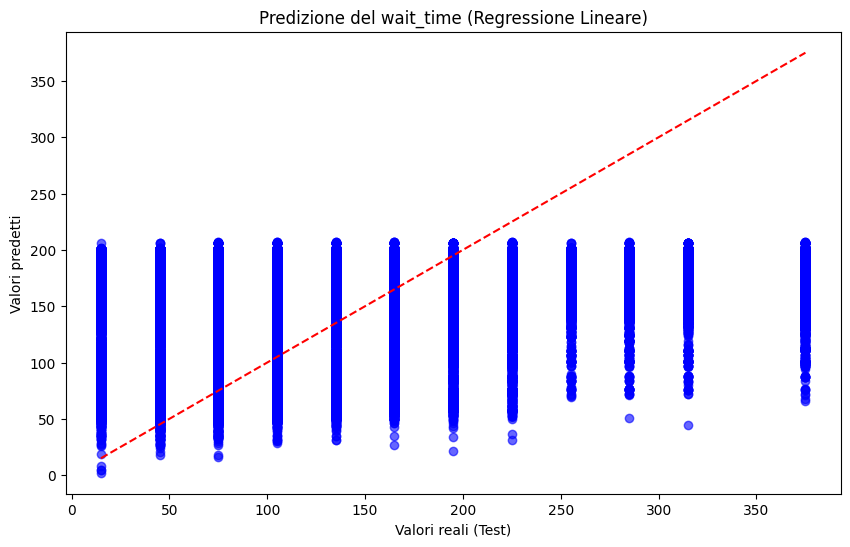

In [33]:
# 8️⃣ Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linea di riferimento
plt.title("Predizione del wait_time (Regressione Lineare)")
plt.xlabel("Valori reali (Test)")
plt.ylabel("Valori predetti")
plt.show()

### Gradient Boosting Regressor

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Ipotizziamo 100 alberi con una profondità massima di 3 (parametri comuni)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Allena il modello sui dati di training
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [13]:
# Previsioni sul set di test
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 72.07
RMSE: 89.94


### Neural Network

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
# 4️⃣ Suddividi il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️⃣ Converti i dati in tensori di PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)  # Regressione: target continuo
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [21]:
# 6️⃣ Definizione della rete neurale per regressione
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Primo strato fully connected (input -> 128 nodi)
        self.fc2 = nn.Linear(128, 64)  # Secondo strato fully connected (128 -> 64 nodi)
        self.fc3 = nn.Linear(64, 1)  # Ultimo strato (64 -> 1 nodo, per output continuo)
        self.relu = nn.ReLU()  # Funzione di attivazione ReLU
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Non c'è attivazione finale, per regressione
        return x

# 7️⃣ Definizione del modello, funzione di perdita e ottimizzatore
input_size = X_train.shape[1]  # Numero di feature
model = NeuralNetwork(input_size)
criterion = nn.MSELoss()  # Mean Squared Error per regressione
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Ottimizzatore Adam

# 8️⃣ Addestramento della rete neurale
num_epochs = 30  # Numero di epoche
batch_size = 64  # Dimensione del batch

In [22]:
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Passaggio forward
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Passaggio backward e aggiornamento dei pesi
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Ogni 5 epoche stampa la loss
    if (epoch + 1) % 5 == 0:
        print(f"Epoca [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoca [5/30], Loss: 6307.9346
Epoca [10/30], Loss: 6339.5386
Epoca [15/30], Loss: 6381.6748
Epoca [20/30], Loss: 6435.8638
Epoca [25/30], Loss: 6488.2695
Epoca [30/30], Loss: 6502.4741



Errore quadratico medio (RMSE): 89.4622


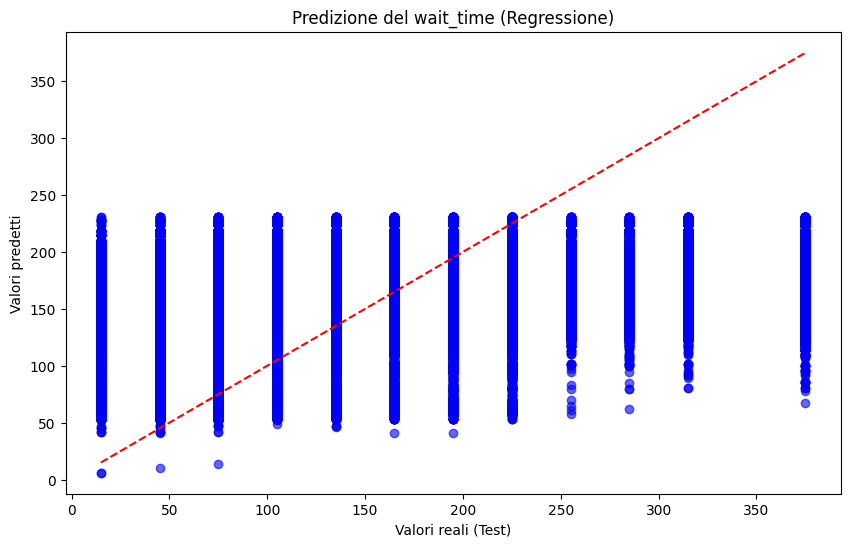

In [23]:
# 🔟 Valutazione sul set di test
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = y_pred.numpy()

# Errore quadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nErrore quadratico medio (RMSE): {rmse:.4f}")

# Visualizzazione dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linea di riferimento
plt.title("Predizione del wait_time (Regressione)")
plt.xlabel("Valori reali (Test)")
plt.ylabel("Valori predetti")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"\nErrore quadratico medio (RMSE): {rmse:.4f}")

MAE: 71.00
